In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

Primers testos que vaig fer. En testejar el timestep va petar

In [3]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES_700", "r")
energies_700 = np.loadtxt(file)

In [4]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES_850", "r")
energies_850 = np.loadtxt(file)

In [5]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES_1000", "r")
energies_1000 = np.loadtxt(file)

In [6]:
a_700,b_700, *c_700 =linregress(energies_700[:,0],energies_700[:,1])
a_850,b_850, *c_850 =linregress(energies_850[:,0],energies_850[:,1])
a_1000,b_1000, *c_1000 =linregress(energies_1000[:,0],energies_1000[:,1])
 
m_700, n_700,  *o_700 =linregress(energies_700[:,0],energies_700[:,5])
m_850, n_850,  *o_850 =linregress(energies_850[:,0],energies_850[:,5])
m_1000,n_1000, *o_1000 =linregress(energies_1000[:,0],energies_1000[:,5])

In [7]:
line_700 = a_700*energies_700[:,0]+b_700
line_850 = a_850*energies_850[:,0]+b_850
line_1000 = a_1000*energies_1000[:,0]+b_1000


line_EH_700 =  m_700*energies_700[:,0] + n_700
line_EH_850 =  m_850*energies_850[:,0] + n_850
line_EH_1000 = m_1000*energies_1000[:,0]+n_1000

In [1]:
print("a_700 =",a_700/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_850 =",a_850/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_1000 =",a_1000/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_700 =",m_700/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_850 =",m_850/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_1000 =",m_1000/(0.0241888428*3*37)*1000,"a.u./(ps·at)")

NameError: name 'a_700' is not defined

a(700) = 2.0853474659006294e-07
a(850) = 2.0747247653585922e-07
a(1000) = 5.041788565669691e-07


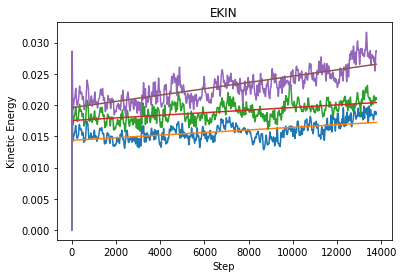

In [12]:
print("a(700) =",a_700)
print("a(850) =",a_850)
print("a(1000) =",a_1000)

plt.plot(energies_700[:,0], energies_700[:,1], line_700, label ="700")
plt.plot(energies_850[:,0], energies_850[:,1], line_850)
plt.plot(energies_1000[:,0], energies_1000[:,1], line_1000)

#plt.ylim(0,2.5)
#plt.legend()
plt.title("EKIN")
plt.xlabel("Step")
plt.ylabel("Kinetic Energy")
# plt.savefig("ekin.png")
plt.show()

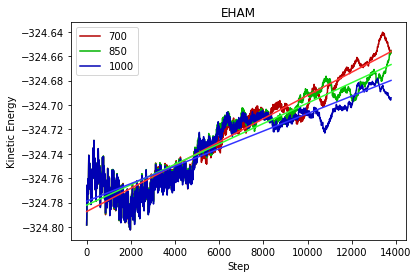

In [11]:
plt.plot(energies_700[:,0], energies_700[:,5], color=(0.7,0,0),  label="700")
plt.plot(energies_850[:,0], energies_850[:,5], color=(0,0.7,0), label="850")
plt.plot(energies_1000[:,0], energies_1000[:,5], color=(0,0,0.7), label="1000")

plt.plot(energies_700[:,0],line_EH_700, color=(1,0.2,0.2))
plt.plot(energies_850[:,0],line_EH_850, color=(0.2,1,0.2))
plt.plot(energies_1000[:,0],line_EH_1000, color=(0.2,0.2,1))
plt.title("EHAM")
plt.xlabel("Step")
plt.ylabel("Kinetic Energy")
plt.legend()
# plt.savefig("eHam.png")
plt.show()

Adaptable

In [29]:
name_list=["700_3","700_4","700_5","850_3","850_4","850_5"]
energies = []

ekin_regr=[]
eham_regr=[]

line = []
line_EH = []

In [4]:
name_list=["600_5","700_5","800_5"]
path="/home/oriol/Oriol/GH_A/qmmm/3_2nd_frame_centered/4_emass_timestep_test2/"

In [2]:
name_list=["600_3","600_4","600_5","700_3","700_4","700_5","800_3","800_4","800_5"]
path="/home/oriol/Oriol/GH_A/qmmm/3_2nd_frame_centered/4_emass_timestep_test2/"

EKin600 = 4.57696e-05 a.u./(ps·at)
EKin700 = 8.19453e-05 a.u./(ps·at)
EKin800 = 1.11196e-04 a.u./(ps·at)


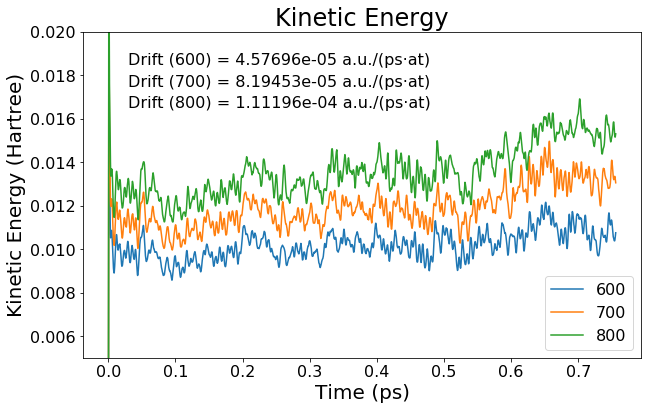

In [77]:


# name_list=["700_5"]
# path="/home/oriol/Oriol/GH_A/qmmm/3_2nd_frame_centered/2_wfopt"

energies = []
ekin_regr=[]
eham_regr=[]
line = []
line_EH = []
ekin_drift = np.zeros((len(name_list),2))
fig = plt.figure(figsize=(10,6))
for i in range(len(name_list)):
#     fig1=fig.add_subplot(211)
    plt.title("EKIN")
    file = open("{}/ENERGIES{}_trim".format(path,name_list[i]), "r")
#     file = open("{}/ENERGIES{}".format(path,name_list[i]), "r")
    energies.append(np.loadtxt(file))
    timestep=int(name_list[i][-1])
    emass=int(name_list[i][:-2])
    ekin_regr.append(np.asarray(linregress(energies[i][10:,0],energies[i][10:,1]))) # Trec els primers 10 valors que hi ha grans fluctuacions
    line.append(ekin_regr[i][0]*energies[i][:,0]*(0.0241888428*timestep)+ekin_regr[i][1])
    ekin_drift[i] = [emass,ekin_regr[i][0]/(0.0241888428*timestep*37)*1000]
    print("EKin{0} = {1:1.5e}".format(emass,ekin_drift[i,1],6),"a.u./(ps·at)")
    plt.plot(energies[i][:,0]*(0.0241888428*timestep/1000), energies[i][:,1], label = emass)
#     plt.plot(energies[i][:,0]*(0.0241888428*timestep), line[i], label = name_list[i])

    file.close()
    
plt.title("Kinetic Energy", fontsize=24)
plt.xlabel("Time (ps)", fontsize=20)
plt.ylabel("Kinetic Energy (Hartree)", fontsize=20)
plt.text(0.03,0.0185,"Drift ({0}) = {1:1.5e} a.u./(ps·at)".format(int(ekin_drift[0,0]),ekin_drift[0,1],6), fontsize=16)
plt.text(0.03,0.0175,"Drift ({0}) = {1:1.5e} a.u./(ps·at)".format(int(ekin_drift[1,0]),ekin_drift[1,1],6), fontsize=16)
plt.text(0.03,0.0165,"Drift ({0}) = {1:1.5e} a.u./(ps·at)".format(int(ekin_drift[2,0]),ekin_drift[2,1],6), fontsize=16)

plt.legend(fontsize=16)
plt.ylim(0.005,0.020)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.savefig("EKin_2.png")
    

plt.show()

EHam600 = 1.68129e-06 a.u./(ps·at)
EHam700 = 1.76085e-06 a.u./(ps·at)
EHam800 = 1.73898e-06 a.u./(ps·at)


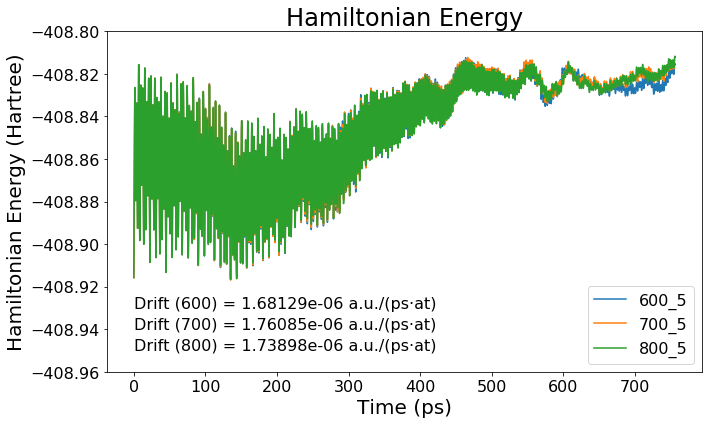

In [105]:
eham_drift = np.zeros((len(name_list),2))
fig1 = plt.figure(figsize=(10,6))
# fig1.add_subplot(1,1,1)
for j in range(len(name_list)):
    file = open("{}/ENERGIES{}_trim".format(path,name_list[j]), "r")
    timestep=int(name_list[j][-1])
    energies.append(np.loadtxt(file))
    eham_regr.append(np.asarray(linregress(energies[j][10:,0],energies[j][10:,5])))
    line_EH.append(eham_regr[j][0]*energies[j][:,0]*(0.0241888428*timestep)+eham_regr[j][1])
    emass=int(name_list[j][:-2])
    eham_drift[j] = [emass,eham_regr[j][0]/(0.0241888428*timestep*49298)*1000]

    print("EHam{0} = {1:1.5e} a.u./(ps·at)".format(emass,eham_drift[j,1]))
    plt.plot(energies[j][:,0]*(0.0241888428*timestep), energies[j][:,5], label = name_list[j])

    file.close()
    
    
    
plt.title("Hamiltonian Energy", fontsize=24)
plt.xlabel("Time (ps)", fontsize=20)
plt.ylabel("Hamiltonian Energy (Hartree)", fontsize=20)
plt.text(0,-408.93,"Drift ({0}) = {1:1.5e} a.u./(ps·at)".format(int(eham_drift[0,0]),eham_drift[0,1],6), fontsize=16)
plt.text(0,-408.94,"Drift ({0}) = {1:1.5e} a.u./(ps·at)".format(int(eham_drift[1,0]),eham_drift[1,1],6), fontsize=16)
plt.text(0,-408.95,"Drift ({0}) = {1:1.5e} a.u./(ps·at)".format(int(eham_drift[2,0]),eham_drift[2,1],6), fontsize=16)
# 875
# 330,-408.935
plt.legend(loc=4,fontsize=16)
plt.ylim(-408.96,-408.80)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("EHam_2.png")


plt.show()

In [ ]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES700_3", "r")
energies700_3 = np.loadtxt(file)

In [ ]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES700_4", "r")
energies700_4 = np.loadtxt(file)

In [ ]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES700_5", "r")
energies700_5 = np.loadtxt(file)

In [ ]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES850_3", "r")
energies850_3 = np.loadtxt(file)

In [ ]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES850_4", "r")
energies850_4 = np.loadtxt(file)

In [ ]:
file = open("/home/oriol/Oriol/GH_A/qmmm/2_2nd_frame/2_wfopt/emass_test/ENERGIES850_5", "r")
energies850_5 = np.loadtxt(file)

In [ ]:
a_700,b_700, *c_700 =linregress(energies_700[:,0],energies_700[:,1])
a_850,b_850, *c_850 =linregress(energies_850[:,0],energies_850[:,1])
a_1000,b_1000, *c_1000 =linregress(energies_1000[:,0],energies_1000[:,1])
 
m_700, n_700,  *o_700 =linregress(energies_700[:,0],energies_700[:,5])
m_850, n_850,  *o_850 =linregress(energies_850[:,0],energies_850[:,5])
m_1000,n_1000, *o_1000 =linregress(energies_1000[:,0],energies_1000[:,5])

In [ ]:
line_700 = a_700*energies_700[:,0]+b_700
line_850 = a_850*energies_850[:,0]+b_850
line_1000 = a_1000*energies_1000[:,0]+b_1000


line_EH_700 =  m_700*energies_700[:,0] + n_700
line_EH_850 =  m_850*energies_850[:,0] + n_850
line_EH_1000 = m_1000*energies_1000[:,0]+n_1000

In [ ]:
print("a_700 =",a_700/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_850 =",a_850/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_1000 =",a_1000/(0.0241888428*3*37)*1000,"a.u./(ps·at)")
print("a_700 =",m_700/(0.0241888428*3*49298)*1000,"a.u./(ps·at)")
print("a_850 =",m_850/(0.0241888428*3*49298)*1000,"a.u./(ps·at)")
print("a_1000 =",m_1000/(0.0241888428*3*49298)*1000,"a.u./(ps·at)")

In [ ]:
print("a(700) =",a_700)
print("a(850) =",a_850)
print("a(1000) =",a_1000)

plt.plot(energies_700[:,0], energies_700[:,1], line_700, label ="700")
plt.plot(energies_850[:,0], energies_850[:,1], line_850)
plt.plot(energies_1000[:,0], energies_1000[:,1], line_1000)

#plt.ylim(0,2.5)
#plt.legend()
plt.title("EKIN")
plt.xlabel("Step")
plt.ylabel("Kinetic Energy")
# plt.savefig("ekin2.png")
plt.show()

In [ ]:
plt.plot(energies_700[:,0], energies_700[:,5], color=(0.7,0,0),  label="700")
plt.plot(energies_850[:,0], energies_850[:,5], color=(0,0.7,0), label="850")
plt.plot(energies_1000[:,0], energies_1000[:,5], color=(0,0,0.7), label="1000")

plt.plot(energies_700[:,0],line_EH_700, color=(1,0.2,0.2))
plt.plot(energies_850[:,0],line_EH_850, color=(0.2,1,0.2))
plt.plot(energies_1000[:,0],line_EH_1000, color=(0.2,0.2,1))
plt.title("EHAM")
plt.xlabel("Step")
plt.ylabel("Kinetic Energy")
plt.legend()
# plt.savefig("eHam2.png")
plt.show()

In [19]:
xa=[   50.00,   
      150.00 ,  
      200.00 ,  
      250.00 ,  
      300.00 ,  
      350.00 ,  
      400.00 ,  
      450.00 ,  
      500.00 ,  
      600.00 ,  
      700.00 ,  
      750.00 ,  
      800.00 ,  
      850.00 ,  
      900.00 ,  
     1000.00 ,  
     1500.00]  

ya= [-276.55966990409,
-276.51553082784 ,
-276.51119461693 ,
-276.51074851870 ,
-276.50940505826 ,
-276.50924036343 ,
-276.50876645026 ,
-276.50907601824 ,
-276.50907603925 ,
-276.50921478444 ,
-276.50918082017 ,
-276.50927497253 ,
-276.50931200980 ,
-276.50948824497 ,
-276.50931286588 ,
-276.50938988636 ,
-276.50958622151]

In [16]:
xa= [50.00,
 150.00,
 200.00,
 250.00,
 300.00,
 350.00,
 400.00,
 450.00,
 500.00,
 600.00,
 700.00,
 750.00,
 800.00,
 850.00,
 900.00,
1000.00]
ya =[-276.55966934819,
-276.51553012670,  
-276.51119409058,  
-276.51074799265,  
-276.50940452961,  
-276.50923983497,  
-276.50876592196,  
-276.50907548990,  
-276.50907551091,  
-276.50921425633,  
-276.50918029231,  
-276.50927444462,  
-276.50931148192,  
-276.50948771704,  
-276.50931233819,  
-276.50938935863]

In [20]:
xb=[50.00,   
      150.00,   
      200.00,   
      250.00,   
      300.00,   
      350.00,   
      400.00,   
      450.00,   
      500.00,   
      600.00,   
      700.00,   
      750.00,   
      800.00,   
      850.00,   
      900.00,   
     1000.00,   
     1500.00]

yb=[-276.55966934819,
-276.51553012670 ,
-276.51119409058 ,
-276.51074799265 ,
-276.50940452961 ,
-276.50923983497 ,
-276.50876592196 ,
-276.50907548990 ,
-276.50907551091 ,
-276.50921425633 ,
-276.50918029231 ,
-276.50927444462 ,
-276.50931148192 ,
-276.50948771704 ,
-276.50931233819 ,
-276.50938935863 ,
-276.50958017130]

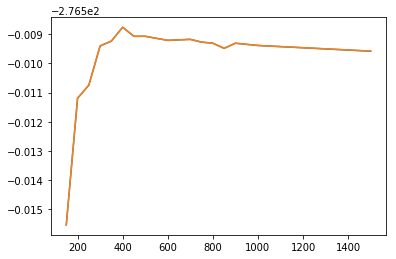

In [32]:
f=1
plt.plot(xa[f:],ya[f:])
plt.plot(xb[f:],yb[f:])
plt.show()

In [28]:
for i in range(10):
    print(i*48,(i*48)**.5)

0 0.0
48 6.928203230275509
96 9.797958971132712
144 12.0
192 13.856406460551018
240 15.491933384829668
288 16.97056274847714
336 18.33030277982336
384 19.595917942265423
432 20.784609690826528


In [24]:
23*3600

82800